In [3]:
!ls *.csv

bakery_riyadh_25km.csv             mosque_riyadh_25km.csv
bank_riyadh_25km.csv               park_riyadh_25km.csv
cafe_riyadh_25km.csv               real_estate_agency_riyadh_25km.csv
convenience_store_riyadh_25km.csv  restaurants_riyadh_25km.csv
gas_station_riyadh_25km.csv        riyadh.csv
gym_riyadh_25km.csv                riyadh_land.csv
hospitals_riayd.csv                schools_riyadh_25km.csv
hospitals_riyadh_25km.csv          shopping_mall_riyadh_25km.csv
laundry_riyadh_25km.csv            supermarket_riyadh_25km.csv
listings.csv                       tempdf.csv
lodging_riyadh_25km.csv


In [4]:
!mv hospitals_small_radius_riayd.csv hospitals_riyadh_25km.csv

mv: hospitals_small_radius_riayd.csv: No such file or directory


In [5]:
import pandas as pd
from ast import literal_eval
import requests
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
import time
import geopy
import geopy.distance
from geopy.distance import VincentyDistance
from collections import Counter

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [6]:
def to_literal_eval(item):
    lit_eval = np.nan
    try:
        lit_eval= literal_eval(str(item))
    except:
        pass
    return lit_eval

def get_dictionary_val(item,key):
    val = item
    try:
        val = item[key]
    except:
        pass
    return val

def epoch_to_local_pd_timestamp(epoch,format ='%Y-%m-%d %H:%M:%S'): 
    try:
        return pd.to_datetime(time.strftime(format, time.localtime(int(epoch))))
    except:
        return np.nan

def get_distance(location1,location2):
    return geopy.distance.geodesic(location1,location2).m

In [38]:
dfs=[]
categories =['schools','hospitals','bank','bakery','cafe','gym','park','real_estate_agency','shopping_mall','supermarket','lodging','laundry','gas_station','convenience_store']

In [39]:
for category in categories:
    df = pd.read_csv('{}_riyadh_25km.csv'.format(category))


    df.geometry=df.geometry.map(to_literal_eval)
    df['category']=category
    df['location']=df.geometry.map(lambda x: get_dictionary_val(x,'location'))
    df['lat']= df.location.map(lambda x: get_dictionary_val(x,'lat'))
    df['lng']= df.location.map(lambda x: get_dictionary_val(x,'lng'))
    df['location_str']=df['lat'].map(str)+","+df['lng'].map(str)
    dfs.append(df)

In [40]:
places_of_interest = pd.concat([*dfs]).reset_index(drop=True) 

In [44]:
highly_rated_poi = places_of_interest[places_of_interest.rating>4.5]

In [43]:
places_of_interest[places_of_interest.rating>4.5].groupby('category').count()

,formatted_address,geometry,icon,id,lat,lng,location,location_str,name,opening_hours,permanently_closed,photos,place_id,plus_code,price_level,rating,reference,types,user_ratings_total
category,,,,,,,,,,,,,,,,,,,
bakery,28,28,28,28,28,28,28,28,28,22,0,9,28,28,0,28,28,28,28
bank,26,26,26,26,26,26,26,26,26,16,0,19,26,26,0,26,26,26,26
cafe,35,35,35,35,35,35,35,35,35,35,0,29,35,35,0,35,35,35,35
convenience_store,11,11,11,11,11,11,11,11,11,8,0,8,11,11,1,11,11,11,11
gas_station,26,26,26,26,26,26,26,26,26,9,0,18,26,26,0,26,26,26,26
gym,103,103,103,103,103,103,103,103,103,59,0,59,103,103,0,103,103,103,103
hospitals,87,87,87,87,87,87,87,87,87,56,0,44,87,87,0,87,87,87,87
laundry,72,72,72,72,72,72,72,72,72,50,0,37,72,72,0,72,72,72,72
lodging,19,19,19,19,19,19,19,19,19,6,0,8,19,19,0,19,19,19,19


In [12]:
ls  *.csv

bakery_riyadh_25km.csv              mosque_riyadh_25km.csv
bank_riyadh_25km.csv                park_riyadh_25km.csv
cafe_riyadh_25km.csv                real_estate_agency_riyadh_25km.csv
convenience_store_riyadh_25km.csv   restaurants_riyadh_25km.csv
gas_station_riyadh_25km.csv         riyadh.csv
gym_riyadh_25km.csv                 riyadh_land.csv
hospitals_riayd.csv                 schools_riyadh_25km.csv
hospitals_riyadh_25km.csv           shopping_mall_riyadh_25km.csv
laundry_riyadh_25km.csv             supermarket_riyadh_25km.csv
listings.csv                        tempdf.csv
lodging_riyadh_25km.csv


In [13]:
riyadh_land = pd.read_csv("riyadh_land.csv")

In [14]:
riyadh_land.head()

,Unnamed: 0,Unnamed: 0.1,ac,address,age,apts,area,backyard,basement,beds,...,vb,wc,wells,updated,created,user_name,user_contact,lat,lng,location_str
0,9,9,0.0,"عريض, الرياض",0.0,0.0,2002.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2019-01-11 17:38:06,2015-08-22 00:54:37,عقاري,554433529.0,24.431198,46.738194,"24.431198120117188,46.73819351196289"
1,29,29,0.0,"عريض, الرياض",0.0,0.0,900.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2019-01-11 17:37:39,2018-04-15 18:57:47,عقاري,554433529.0,24.436342,46.725208,"24.436342239379883,46.7252082824707"
2,47,47,NaN,الرياض,NaN,NaN,1800.0,NaN,NaN,NaN,...,NaN,NaN,NaN,2019-01-11 17:36:48,2018-12-20 17:17:11,نور,532214149.0,24.861555,46.613674,"24.861555,46.613674"
3,180,180,NaN,الرياض,NaN,NaN,750.0,NaN,NaN,NaN,...,NaN,NaN,NaN,2019-01-11 17:31:53,2019-01-11 08:25:38,ابو سعيد,542765293.0,24.853915,46.671474,"24.853915,46.671474"
4,183,183,NaN,الرياض,NaN,NaN,1089.0,NaN,NaN,NaN,...,NaN,NaN,NaN,2019-01-11 17:31:41,2018-11-11 13:23:25,ابو سعيد,542765293.0,24.843917,46.680713,"24.843917,46.680713"


In [15]:
riyadh_land.location_str[1]

'24.436342239379883,46.7252082824707'

In [16]:
places_of_interest.location_str[0]

'24.7958977,46.7458714'

In [17]:
get_distance(riyadh_land.location_str[7],places_of_interest.location_str[0])

11426.617570462808

In [18]:
places_of_interest.iloc[0]['category']

'schools'

In [48]:
radius = 5000
my_dict={}
for i,land_location in enumerate(riyadh_land.location_str):
    if(i%100==0):
        print(i)
    my_list=[]
    for j,poi_location in enumerate(highly_rated_poi.location_str):
        if get_distance(land_location,poi_location)<radius:
            my_list.append(places_of_interest.iloc[j]['category'])
    my_dict[i]=Counter(my_list)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700


In [49]:
my_df =pd.DataFrame(my_dict)

In [52]:
my_df.T.to_csv("poi_near_riyadh_land.csv",index=False)


In [53]:
poi_near_riyadh_land=pd.read_csv('poi_near_riyadh_land.csv')

In [54]:
poi_near_riyadh_land.head()

,hospitals,schools
0,NaN,1.0
1,NaN,2.0
2,8.0,36.0
3,7.0,27.0
4,7.0,34.0


In [55]:
len(riyadh_land),len(poi_near_riyadh_land)

(15781, 15781)

In [57]:
poi_near_riyadh_land.fillna(value=0,inplace=True)

In [59]:
riyadh_land_poi =pd.concat([riyadh_land, poi_near_riyadh_land], axis=1)

In [60]:
riyadh_land_poi.to_csv('riyadh_land_with_poi.csv')

In [61]:
len(riyadh_land_poi)

15781

In [63]:
riyadh_land_poi[['meter_price','hospitals','schools']].corr()

,meter_price,hospitals,schools
meter_price,1.000000,0.218894,0.224884
hospitals,0.218894,1.000000,0.889071
schools,0.224884,0.889071,1.000000


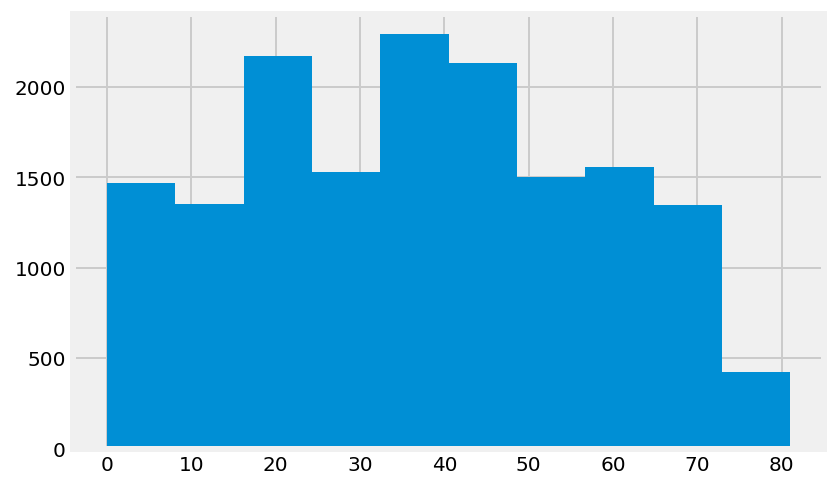

In [65]:
riyadh_land_poi.schools.hist() 